In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
# load the data
train_ds = np.load('train_data.npz')
val_ds = np.load('val_data.npz')
test_ds = np.load('test_data.npz')

In [3]:
print(train_ds.files)
print(val_ds.files)
print(test_ds.files)

['imgs', 'labels']
['imgs', 'labels']
['imgs']


In [4]:
print("Shape of train_ds images:", train_ds['imgs'].shape)  
print("Shape of train_ds labels:", train_ds['labels'].shape)
print("Shape of val_ds images:", val_ds['imgs'].shape)  
print("Shape of val_ds labels:", val_ds['labels'].shape)
print("Shape of test_ds images:", test_ds['imgs'].shape)  

Shape of train_ds images: (4708, 28, 28)
Shape of train_ds labels: (4708, 1)
Shape of val_ds images: (524, 28, 28)
Shape of val_ds labels: (524, 1)
Shape of test_ds images: (624, 28, 28)


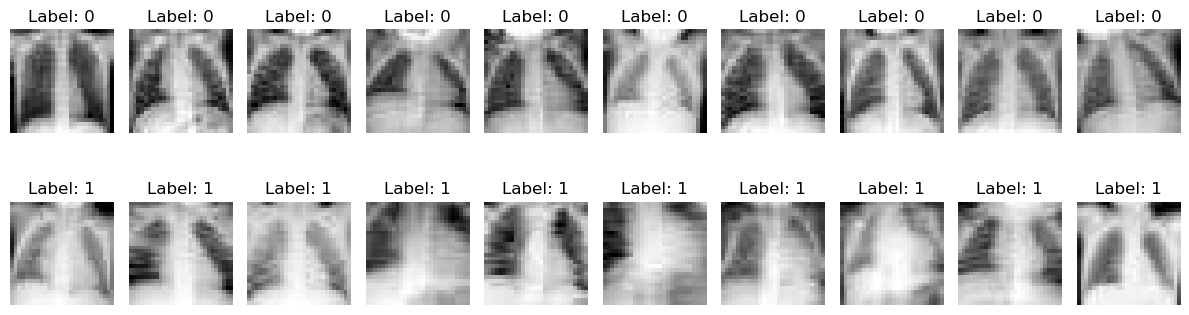

In [5]:
num_samples = 10
sample_zero_indexes = np.where(train_ds['labels'] == 0)[0][:num_samples]
sample_one_indexes = np.where(train_ds['labels'] == 1)[0][:num_samples]

fig, axes = plt.subplots(2, num_samples, figsize=(12, 4)) # Adjust figsize as needed

for index_0, index_1 in zip(sample_zero_indexes, sample_one_indexes):
    axes[0, np.where(sample_zero_indexes == index_0)[0][0]].imshow(train_ds['imgs'][index_0], cmap='gray')
    axes[0, np.where(sample_zero_indexes == index_0)[0][0]].axis('off')
    axes[0, np.where(sample_zero_indexes == index_0)[0][0]].set_title('Label: 0')

    axes[1, np.where(sample_one_indexes == index_1)[0][0]].imshow(train_ds['imgs'][index_1], cmap='gray')
    axes[1, np.where(sample_one_indexes == index_1)[0][0]].axis('off')
    axes[1, np.where(sample_one_indexes == index_1)[0][0]].set_title('Label: 1')

plt.tight_layout()
plt.show()

In [7]:
def compute_covariance_matrix(X):
    X = X.reshape(X.shape[0], -1)  
    X_centered = X - np.mean(X, axis=0)
    return np.cov(X_centered, rowvar=False)

In [8]:
def perform_pca(X, num_components):
    covariance_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    X_centered = X.reshape(X.shape[0], -1) - np.mean(X.reshape(X.shape[0], -1), axis=0)
    X_reduced = np.dot(X_centered, selected_eigenvectors)
    return X_reduced, selected_eigenvectors, sorted_eigenvalues[:num_components]

In [ ]:
total_variance = np.sum(compute_covariance_matrix(train_ds['imgs']).diagonal())
explained_variances = []
desired = 0.95
num_components=1
explained_variance = 0
while explained_variance < desired:
    _, _, eigenvalues = perform_pca(train_ds['imgs'], num_components)
    explained_variance = np.sum(eigenvalues) / total_variance
    explained_variances.append(explained_variance)
    num_components += 1


In [17]:
num_components_list = list(range(1, len(explained_variances) + 1))
print(f"Number of components to explain at least {desired*100}% variance: {num_components - 1}")
percentage_explained_variances = [var * 100 for var in explained_variances]


Number of components to explain at least 95.0% variance: 71


In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(num_components_list, percentage_explained_variances, marker='o')
plt.title('Explained Variance vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('% Explained Variance')
# plt.xticks(num_components_list)
plt.grid()
plt.show()

In [ ]:
s ="""
use t-SNE (from scikit-learn or any other suitable library) to further reduce the data to 2 dimensions and plot the results to visualize
 2
the spread of your positive (labeled 1) and negative classes (labeled 0). Include this plot
 in your report and clearly mention the number of principal components selected to achieve
 the 95% variance threshold
 """

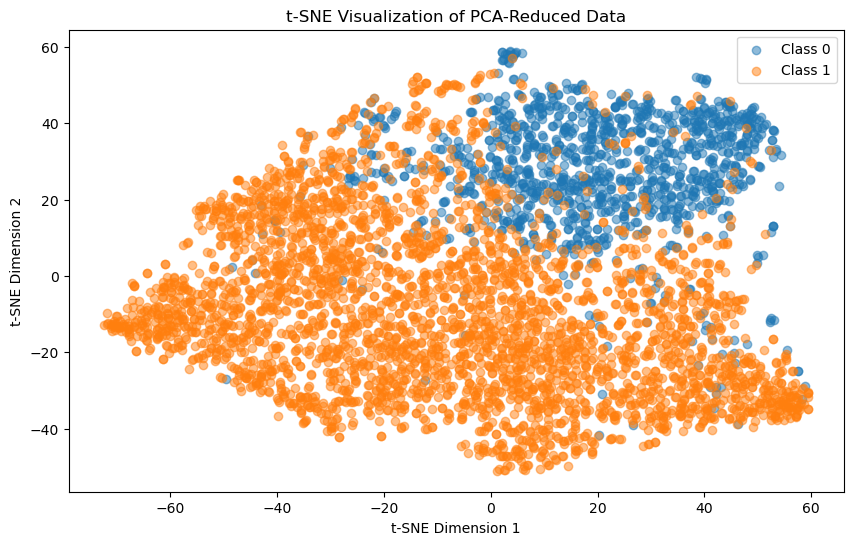

In [ ]:

# PCA reduce first (e.g., to 50 dims)
X_reduced, _, _ = perform_pca(train_ds['imgs'], 71) # 71 components for ~95% variance
labels = train_ds['labels'].ravel()   # shape becomes (4708,)
# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_reduced)
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[labels == 0, 0], X_tsne[labels == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X_tsne[labels == 1, 0], X_tsne[labels == 1, 1], label='Class 1', alpha=0.5)
plt.title('t-SNE Visualization of PCA-Reduced Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
